In [67]:
import pandas as pd 
import numpy as np 


filepath = 'E:/mc-101k/'
df1=pd.read_table(filepath+'user_artists.dat',encoding='UTF-8')
df2=pd.read_table(filepath+'artists.dat',header=0,encoding='UTF-8',names=['artistID','artistNAME','url','pictureURL'])

df2.drop(['url','pictureURL'],axis=1,inplace=True)

music_data1= df1.merge(df2,on='artistID')

music_data1.head(92834)

,userID,artistID,weight,artistNAME
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran
...,...,...,...,...
92829,2100,18726,337,Nyktalgia
92830,2100,18727,297,Atsakau niekadA
92831,2100,18728,281,Domantas Razauskas
92832,2100,18729,280,Atalyja


In [61]:
music_data1['voteRating']=1

m = music_data1['weight'].quantile(0.9)

W_Rating= m*0.1

music_data1['voteRating']=music_data1['weight']/W_Rating

music_data1['voteRating']=np.where(music_data1.voteRating>=10,10,music_data1['weight']/W_Rating)

C= music_data1['voteRating'].mean()

music_data1.head(92834)

,userID,artistID,weight,artistNAME,voteRating
0,2,51,13883,Duran Duran,10.000000
1,4,51,228,Duran Duran,1.643836
2,27,51,85,Duran Duran,0.612833
3,28,51,10,Duran Duran,0.072098
4,62,51,528,Duran Duran,3.806777
...,...,...,...,...,...
92829,2100,18726,337,Nyktalgia,2.429704
92830,2100,18727,297,Atsakau niekadA,2.141312
92831,2100,18728,281,Domantas Razauskas,2.025955
92832,2100,18729,280,Atalyja,2.018745


In [62]:
q_music = music_data1.copy().loc[music_data1['weight'] >= m]
q_music.shape

(9288, 5)

In [63]:
def weighted_rating(x, m=m, C=C):
    v = x['weight']
    R = x['voteRating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
# Define a new feature 'score' and calculate its value with `weighted_rating()`

q_music['score'] = q_music.apply(weighted_rating, axis=1)

In [65]:
#Sort movies based on score calculated above
q_music = q_music.sort_values('score', ascending=False)
# q_music.drop('voteRating',axis=1, inplace=True)
# q_music.drop('userID',axis=1, inplace=True)
# q_music.drop('friendID',axis=1, inplace=True)
# q_music.drop_duplicates( 'artistID','first',True)
#Print the top 15 movies
q_music.drop(['voteRating'],axis=1,inplace=True)
q_music.head(3000)

,userID,artistID,weight,artistNAME,score
2258,1642,72,352698,Depeche Mode,9.973051
35313,2071,792,324663,Thalía,9.970734
26772,1094,511,320725,U2,9.970376
7610,1905,203,257978,Blur,9.963210
26140,1664,498,227829,Paramore,9.958371
...,...,...,...,...,...
27005,512,517,3190,Korn,7.915196
50127,1465,1470,3189,Lifehouse,7.914741
34815,941,757,3187,Crystal Castles,7.913829
80646,1195,8832,3186,Beach Fossils,7.913373


Text(0.5, 1.0, 'Popular artist  /  Top Ten')

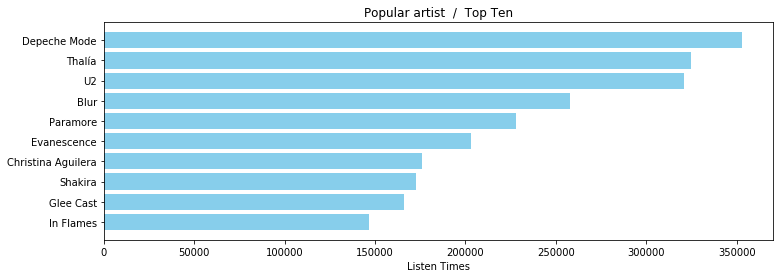

In [85]:
pop= q_music.sort_values('score', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['artistNAME'].head(11),pop['weight'].head(11), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Listen Times")
plt.title("Popular artist  /  Top Ten")